In [19]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import time
import shutil
import itertools
import tensorflow
from PIL import Image
import seaborn as sb
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam,Nadam,Ftrl
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,AveragePooling2D
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau,ModelCheckpoint

In [2]:
#pip install opencv-contrib-python

In [3]:
#paths to the image dataset directory
print(os.listdir('C:/Users/ASUS/Desktop/DATASETS/Odia Numbers Dataset/'))

['Class00', 'Class01', 'Class02', 'Class03', 'Class04', 'Class05', 'Class06', 'Class07', 'Class08', 'Class09', 'Odia Numbers Dataset', 'test_nums']


In [7]:
#class paths stored in variables
train_0=r'C:\Users\ASUS\Desktop\DATASETS\Odia Numbers Dataset\Class00'
train_1=r'C:/Users/ASUS/Desktop/DATASETS/Odia Numbers Dataset/Class01'
train_2=r'C:/Users/ASUS/Desktop/DATASETS/Odia Numbers Dataset/Class02'
train_3=r'C:/Users/ASUS/Desktop/DATASETS/Odia Numbers Dataset/Class03'
#Numbers Dataset/Class03'
train_4=r'C:/Users/ASUS/Desktop/DATASETS/Odia Numbers Dataset/Class04'
train_5=r'C:/Users/ASUS/Desktop/DATASETS/Odia Numbers Dataset/Class05'
train_6=r'C:/Users/ASUS/Desktop/DATASETS/Odia Numbers Dataset/Class06'
train_7=r'C:/Users/ASUS/Desktop/DATASETS/Odia Numbers Dataset/Class07'
train_8=r'C:/Users/ASUS/Desktop/DATASETS/Odia Numbers Dataset/Class08'
train_9=r'C:/Users/ASUS/Desktop/DATASETS/Odia Numbers Dataset/Class09'
test=r'C:/Users/ASUS/Desktop/DATASETS/Odia Numbers Dataset/test_nums/'

In [6]:
#reading the image as an array and converting it to RGB
#read = lambda imname: np.asarray(Image.open(imname).convert("RGB"))

In [8]:
#reading the images of each folder using cv2 and resizing each image to a particular dimension for feeding into our model
ims_0 = [cv2.resize(cv2.imread(os.path.join(train_0, filename)),(81,81)) for filename in os.listdir(train_0)]
X_0= np.asarray(ims_0)

ims_1 = [cv2.resize(cv2.imread(os.path.join(train_1, filename)),(81,81)) for filename in os.listdir(train_1)]
X_1= np.asarray(ims_1)

ims_2 = [cv2.resize(cv2.imread(os.path.join(train_2, filename)),(81,81)) for filename in os.listdir(train_2)]
X_2= np.asarray(ims_2)

ims_3 = [cv2.resize(cv2.imread(os.path.join(train_3, filename)),(81,81)) for filename in os.listdir(train_3)]
X_3= np.asarray(ims_3)

ims_4 = [cv2.resize(cv2.imread(os.path.join(train_4, filename)),(81,81)) for filename in os.listdir(train_4)]
X_4= np.asarray(ims_4)

ims_5 = [cv2.resize(cv2.imread(os.path.join(train_5, filename)),(81,81)) for filename in os.listdir(train_5)]
X_5= np.asarray(ims_5)

ims_6 = [cv2.resize(cv2.imread(os.path.join(train_6, filename)),(81,81)) for filename in os.listdir(train_6)]
X_6= np.asarray(ims_6)

ims_7 = [cv2.resize(cv2.imread(os.path.join(train_7, filename)),(81,81)) for filename in os.listdir(train_7)]
X_7= np.asarray(ims_7)

ims_8 = [cv2.resize(cv2.imread(os.path.join(train_8, filename)),(81,81)) for filename in os.listdir(train_8)]
X_8= np.asarray(ims_8)

ims_9 = [cv2.resize(cv2.imread(os.path.join(train_9, filename)),(81,81)) for filename in os.listdir(train_9)]
X_9= np.asarray(ims_9)

test_0 = [cv2.resize(cv2.imread(os.path.join(test, filename)),(81,81)) for filename in os.listdir(test)]
X_test= np.asarray(test_0)

In [9]:
#checking the shape of each image and each folder
print(X_0.shape)
print(X_0[1].shape)


(17, 81, 81, 3)
(81, 81, 3)


In [10]:
#creating labels for each digit individually
Y_0 = np.full((X_0.shape[0]),0)
Y_1 = np.full((X_1.shape[0]),1)
Y_2 = np.full((X_2.shape[0]),2)
Y_3 = np.full((X_3.shape[0]),3)
Y_4 = np.full((X_4.shape[0]),4)
Y_5 = np.full((X_5.shape[0]),5)
Y_6 = np.full((X_6.shape[0]),6)
Y_7 = np.full((X_7.shape[0]),7)
Y_8 = np.full((X_8.shape[0]),8)
Y_9 = np.full((X_9.shape[0]),9)

In [11]:
#checking the shape of all the image and label folders of all digits
print(X_0.shape)
print(Y_0.shape)
print(X_1.shape)
print(Y_1.shape)
print(X_2.shape)
print(Y_2.shape)
print(X_3.shape)
print(Y_3.shape)
print(X_4.shape)
print(Y_4.shape)
print(X_5.shape)
print(Y_5.shape)
print(X_6.shape)
print(Y_6.shape)
print(X_7.shape)
print(Y_7.shape)
print(X_8.shape)
print(Y_8.shape)
print(X_9.shape)
print(Y_9.shape)
#4589

(17, 81, 81, 3)
(17,)
(17, 81, 81, 3)
(17,)
(17, 81, 81, 3)
(17,)
(17, 81, 81, 3)
(17,)
(18, 81, 81, 3)
(18,)
(18, 81, 81, 3)
(18,)
(18, 81, 81, 3)
(18,)
(17, 81, 81, 3)
(17,)
(18, 81, 81, 3)
(18,)
(19, 81, 81, 3)
(19,)


In [12]:
#merging the digits and their labels
X_train= np.concatenate((X_0,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9),axis=0)
Y_train= np.concatenate((Y_0,Y_1,Y_2,Y_3,Y_4,Y_5,Y_6,Y_7,Y_8,Y_9),axis=0)

In [13]:
print(X_train.shape)
print(Y_train.shape)

(176, 81, 81, 3)
(176,)


In [14]:
#shuffling the data
s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

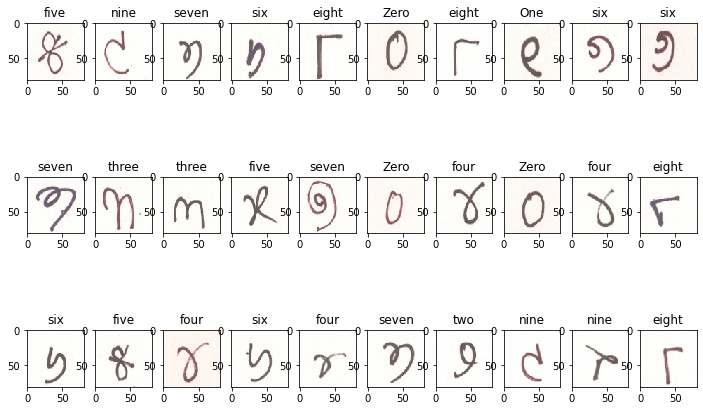

In [15]:
#displaying the first few data of the training set along with their labels
w=30
h=30
fig= plt.figure(figsize=(12,8))
cols=10
rows =3
for i in range(1,cols*rows+1):
    ax=fig.add_subplot(rows,cols,i)
    if Y_train[i]==0:
        ax.title.set_text('Zero')
    elif Y_train[i]==1:
        ax.title.set_text('One')
    elif Y_train[i]==2:
        ax.title.set_text('two')    
    elif Y_train[i]==3:
        ax.title.set_text('three')
    elif Y_train[i]==4:
        ax.title.set_text('four')
    elif Y_train[i]==5:
        ax.title.set_text('five')
    elif Y_train[i]==6:
        ax.title.set_text('six')
    elif Y_train[i]==7:
        ax.title.set_text('seven')    
    elif Y_train[i]==8:
        ax.title.set_text('eight')
    elif Y_train[i]==9:
        ax.title.set_text('nine')    
    plt.imshow(X_train[i],interpolation='nearest')
plt.show()    

In [16]:
X_train = X_train.reshape(-1,81,81,3)
X_test = X_test.reshape(-1,81,81,3)

In [17]:
print(X_train.shape)
print(Y_train.shape)

(176, 81, 81, 3)
(176,)


In [18]:
#normalising the train and test data
X_train_norm=X_train/255
X_test_norm=X_test/255

In [20]:
from tensorflow.keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape = (81, 81, 3),include_top = False,weights = 'imagenet')
# we don’t have to train all the layers, we make them non_trainable
for layer in base_model.layers:
    layer.trainable = False
# Flatten the output layer to 1 dimension
x = Flatten()(base_model.output)
#fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)

x = Dropout(0.5)(x)

x = Dense(10,activation='softmax')(x) 
model_vg16 = tensorflow.keras.models.Model(base_model.input,x)
model_vg16.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [21]:
model_vg16.fit(X_train, Y_train, epochs = 10,validation_split=0.2)

Epoch 1/10
5/5 [==============================] - 10s 2s/step - loss: 15.1792 - accuracy: 0.2714 - val_loss: 6.8713 - val_accuracy: 0.4444
Epoch 2/10
5/5 [==============================] - 8s 2s/step - loss: 9.0565 - accuracy: 0.4286 - val_loss: 4.2977 - val_accuracy: 0.6944
Epoch 3/10
5/5 [==============================] - 8s 2s/step - loss: 5.0708 - accuracy: 0.6643 - val_loss: 2.2143 - val_accuracy: 0.7778
Epoch 4/10
5/5 [==============================] - 8s 2s/step - loss: 2.5066 - accuracy: 0.7286 - val_loss: 2.8998 - val_accuracy: 0.6667
Epoch 5/10
5/5 [==============================] - 7s 2s/step - loss: 1.5342 - accuracy: 0.8071 - val_loss: 1.0140 - val_accuracy: 0.8611
Epoch 6/10
5/5 [==============================] - 7s 2s/step - loss: 0.6034 - accuracy: 0.9143 - val_loss: 0.6778 - val_accuracy: 0.8889
Epoch 7/10
5/5 [==============================] - 8s 2s/step - loss: 1.1607 - accuracy: 0.9071 - val_loss: 0.4741 - val_accuracy: 0.8611
Epoch 8/10
5/5 [=======================

In [22]:
model_vg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 81, 81, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 81, 81, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 81, 81, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 40, 40, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 40, 40, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 40, 40, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 20, 20, 128)       0     

In [23]:
#saving the model
from keras.models import load_model
model_vg16.save("ocr1.h5")

In [25]:
#predicting a single image from test set
from keras.applications.vgg16 import preprocess_input, decode_predictions
loaded_model = load_model("ocr1.h5")
img_data = np.expand_dims(X_test[8], axis=0)
img_data = preprocess_input(img_data)
preds = loaded_model.predict(img_data)

1/1 [==============================] - 1s 517ms/step


In [30]:
#displaying the predictions for each class
preds[0]

array([9.3368655e-09, 1.7333690e-07, 9.3547463e-01, 1.4084806e-10,
       1.3382606e-12, 1.4876350e-10, 7.8587695e-13, 6.4525157e-02,
       1.8994497e-11, 7.2384815e-10], dtype=float32)

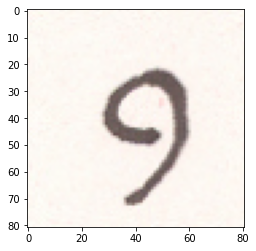

In [33]:
#displaying the test image on which predictions were run
plt.imshow(X_test[8])

In [31]:
#finding the class with max probability outcome which also corresponds to the english translation of that odia digit
pred_class=(list(preds[0])).index(max((list(preds[0]))))

In [32]:
#printing the class and the english translation of the input image
pred_class

2

In [47]:
#predicting all the samples in the test set
all_preds=[]
for img in X_test:
    img_data = np.expand_dims(img, axis=0)
    img_data = preprocess_input(img_data)
    preds = loaded_model.predict(img_data)
    print(preds[0])
    pred_class=(list(preds[0])).index(max((list(preds[0]))))
    all_preds.append(pred_class)
    print(pred_class)

1/1 [==============================] - 0s 138ms/step
[2.1864367e-10 4.6570769e-10 8.3807258e-08 1.0411690e-08 3.2887307e-03
 6.8660408e-01 2.2306843e-09 3.2260878e-08 3.0979192e-01 3.1509352e-04]
5
1/1 [==============================] - 0s 117ms/step
[5.3282562e-23 1.4218616e-13 7.5127566e-08 3.4269134e-15 2.4335833e-02
 3.0902687e-09 4.6838224e-05 9.5163041e-01 2.3986753e-02 4.4531176e-10]
7
1/1 [==============================] - 0s 121ms/step
[1.0293750e-26 5.0432675e-36 2.0622490e-22 3.1444207e-23 7.2698852e-25
 5.8668159e-26 2.2494144e-28 6.4882580e-32 1.0000000e+00 2.0581131e-24]
8
1/1 [==============================] - 0s 115ms/step
[3.3882466e-25 8.2089612e-26 6.0705161e-15 2.5127546e-21 2.9708985e-07
 3.9901687e-17 6.7075252e-12 1.2967465e-27 9.9999976e-01 4.6983395e-10]
8
1/1 [==============================] - 0s 116ms/step
[2.0677431e-05 1.5354744e-01 1.5491141e-01 2.2431741e-02 7.4585171e-07
 9.4070449e-02 4.7671057e-02 5.2733940e-01 6.6918856e-06 3.6499554e-07]
7
1/1 [=====

In [52]:
print(all_preds)
#this contains the list of all the predictions

[5, 7, 8, 8, 7, 4, 5, 2, 2, 3, 1, 4, 2, 5, 3, 4, 5, 6, 7, 8, 8, 8, 9, 9, 7, 7, 9, 2, 0, 0, 0]


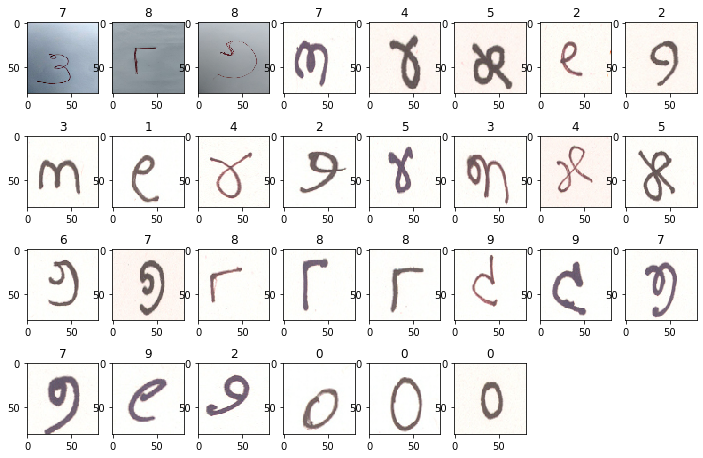

In [51]:
#displaying all the test images along with their predicted image labels
w=30
h=30
fig= plt.figure(figsize=(12,8))
cols=8
rows =4
for i in range(1,cols*rows-1):
    ax=fig.add_subplot(rows,cols,i)
    plt.imshow(X_test[i],interpolation='nearest')
    ax.title.set_text(str(all_preds[i]))
plt.show()    